#### **Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### **Import Raw Data**

In [3]:
data = pd.read_csv('blinkit_data.csv')

#### **Sample Data**

In [4]:
data.head(5) 

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [5]:
data.tail(10)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8513,Regular,DRY23,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.108568,NaN,42.9112,4.0
8514,low fat,FDA11,Baking Goods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.043029,NaN,94.7436,4.0
8515,low fat,FDK38,Canned,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.053032,NaN,149.1734,4.0
8516,low fat,FDO38,Canned,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.072486,NaN,78.9986,4.0
8517,low fat,FDG32,Fruits and Vegetables,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.175143,NaN,222.3772,4.0
8518,low fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


### **Size of data**

In [6]:
data.shape

(8523, 12)

### **Field Info**

In [7]:
data.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

### **Data Types**

In [8]:
data.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

### **Data Cleaning**

In [9]:
data['Item Fat Content'].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

In [10]:
data['Item Fat Content'] = data['Item Fat Content'].replace({'low fat' : 'Low Fat', 'LF' : 'Low Fat', 'reg' : 'Regular'})

In [11]:
data['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

### **KPI**

In [12]:
## Total Sales

total_sale = data['Sales'].sum()

## Average Sales
avg_sale = data['Sales'].mean()

# No of item sold
no_of_itemsold = data['Sales'].count() 

# Average Rating
avg_rating = data['Rating'].mean()

print("Total Sales:", total_sale)
print("Average Sales:", avg_sale)
print("No of item sold:", no_of_itemsold)
print("Average Rating:", avg_rating)


Total Sales: 1201681.4808
Average Sales: 140.9927819781767
No of item sold: 8523
Average Rating: 3.965857092573038


### **Charts Requirements**

#### **Total Sales by Fat Content**

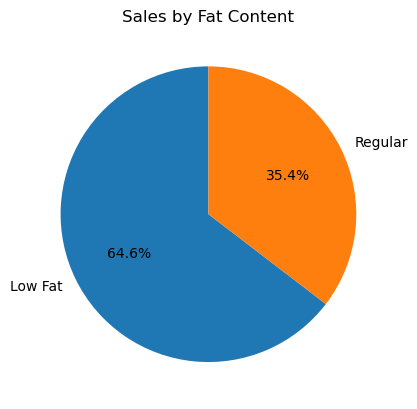

In [13]:
sales_by_fat = data.groupby('Item Fat Content')['Sales'].sum() 

plt.pie(sales_by_fat, labels = sales_by_fat.index, autopct = '%.1f%%', startangle = 90)

plt.title('Sales by Fat Content')
plt.show()

#### **Total Sales by Item Type**

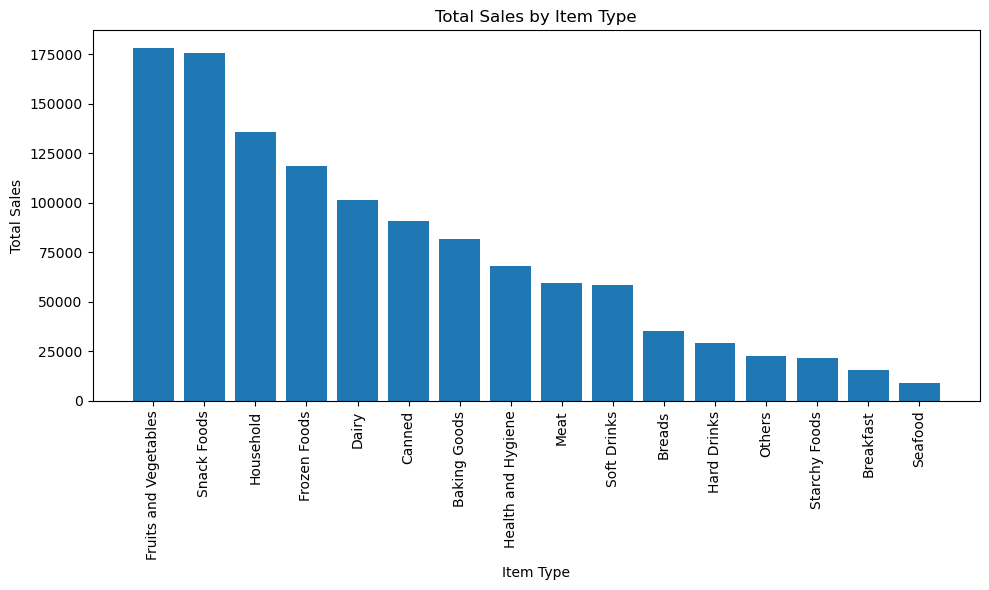

In [14]:
sales_by_type = round(data.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)) 

plt.figure(figsize=(10,6))
plt.bar(sales_by_type.index, sales_by_type.values)
plt.xticks(rotation = 90) 
plt.xlabel("Item Type")
plt.ylabel("Total Sales")
plt.title("Total Sales by Item Type")

plt.tight_layout() 
plt.show() 

### **Fat Content by Outlet for Total Sales** 

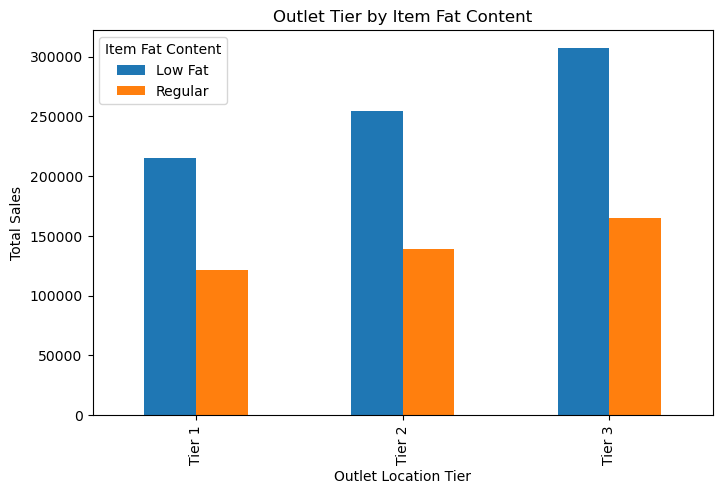

In [15]:
grouped = data.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack() 

grouped.plot(kind = 'bar', figsize=(8,5), title = 'Outlet Tier by Item Fat Content')
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.show() 

### **Total Sales by Outlet Establishment**

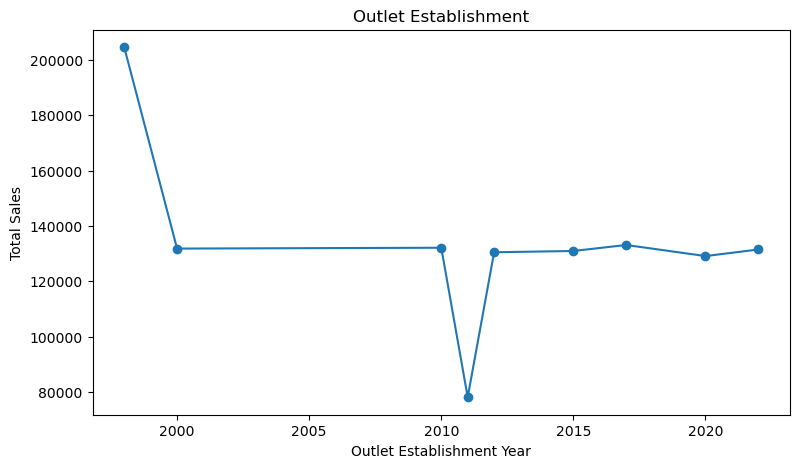

In [17]:
sales_by_year = data.groupby('Outlet Establishment Year')['Sales'].sum()
plt.figure(figsize=(9,5))
plt.plot(sales_by_year.index, sales_by_year.values, marker = 'o', linestyle = '-')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Outlet Establishment')

plt.show() 

### **Sales by Outlet Size** 

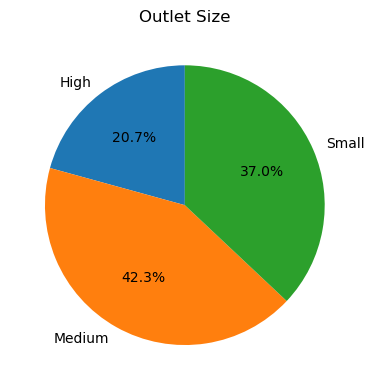

In [21]:
sales_by_size = data.groupby('Outlet Size')['Sales'].sum()

plt.figure(figsize=(4,4))
plt.pie(sales_by_size, labels = sales_by_size.index, autopct= '%1.1f%%', startangle=90)
plt.title('Outlet Size')
plt.tight_layout() 
plt.show() 

### **Sales by Outlet Location**

In [ ]:
sales_by_location = data.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values('Sales', ascending = False)

plt.figure(figsize=(8,3))
ax = sns.barplot(x='Sales', y='Outlet Location Type', data = sales_by_location)

plt.title('Total